In [1]:
import torch

import numpy as np

from matplotlib import pyplot as plt

In [2]:
im = torch.load(r'C:\Users\Lazar\OneDrive\Desktop\RU Courses\AI in Medical Imaging\project\aimi-project\SegFormer3D-main\data\local_data\ULS2023_Training_Data_Oversampling\MIX_00000\MIX_00000_im.pt', weights_only = False)
label = torch.load(r'C:\Users\Lazar\OneDrive\Desktop\RU Courses\AI in Medical Imaging\project\aimi-project\SegFormer3D-main\data\local_data\ULS2023_Training_Data_Oversampling\MIX_00000\MIX_00000_label.pt', weights_only = False)

pred = np.roll(label, (1, 1, 1, 5, 5))

In [5]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from matplotlib.patches import Patch

def visualize_middle_slice_with_border(voi, prediction, label):
    """
    Visualize the middle slice of a VOI with border-only overlays for prediction and label.

    Args:
        voi (torch.Tensor): Input VOI of shape (1, 1, 64, 128, 128)
        prediction (torch.Tensor): Binary prediction of the same shape
        label (torch.Tensor): Binary ground truth label of the same shape
    """
    assert voi.shape == prediction.shape == label.shape, "Shapes must match and be (1, 1, 64, 128, 128)"

    # Convert tensors to NumPy arrays
    voi_np = voi.squeeze()
    pred_np = prediction.squeeze().astype(np.uint8)
    label_np = label.squeeze().astype(np.uint8)

    # Get the middle slice along the depth dimension
    mid_slice = voi_np.shape[0] // 2
    base_slice = voi_np[mid_slice]
    pred_slice = pred_np[mid_slice]
    label_slice = label_np[mid_slice]

    # Define edge detection kernel (simple Laplacian)
    kernel = np.array([[1, 1, 1],
                       [1, -8, 1],
                       [1, 1, 1]], dtype=np.int8)

    def extract_border(binary_slice):
        padded = np.pad(binary_slice, pad_width=1, mode='constant', constant_values=0)
        border = np.zeros_like(binary_slice)
        for i in range(binary_slice.shape[0]):
            for j in range(binary_slice.shape[1]):
                region = padded[i:i+3, j:j+3]
                val = np.sum(region * kernel)
                border[i, j] = 1 if val != 0 and binary_slice[i, j] == 1 else 0
        return border

    # Extract borders
    pred_border = extract_border(pred_slice)
    label_border = extract_border(label_slice)

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.imshow(base_slice, cmap="gray")

    # Overlay label border (red)
    y_label, x_label = np.where(label_border == 1)
    plt.scatter(x_label, y_label, c='red', s=2, label='Label Border')

    # Overlay prediction border (blue)
    y_pred, x_pred = np.where(pred_border == 1)
    plt.scatter(x_pred, y_pred, c='blue', s=2, label='Prediction Border')

    # Legend and formatting
    legend_elements = [
        Patch(facecolor='none', edgecolor='red', label='Label Border'),
        Patch(facecolor='none', edgecolor='blue', label='Prediction Border')
    ]
    plt.legend(handles=legend_elements, loc='lower right')
    plt.title("Middle Slice with Label and Prediction Borders")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


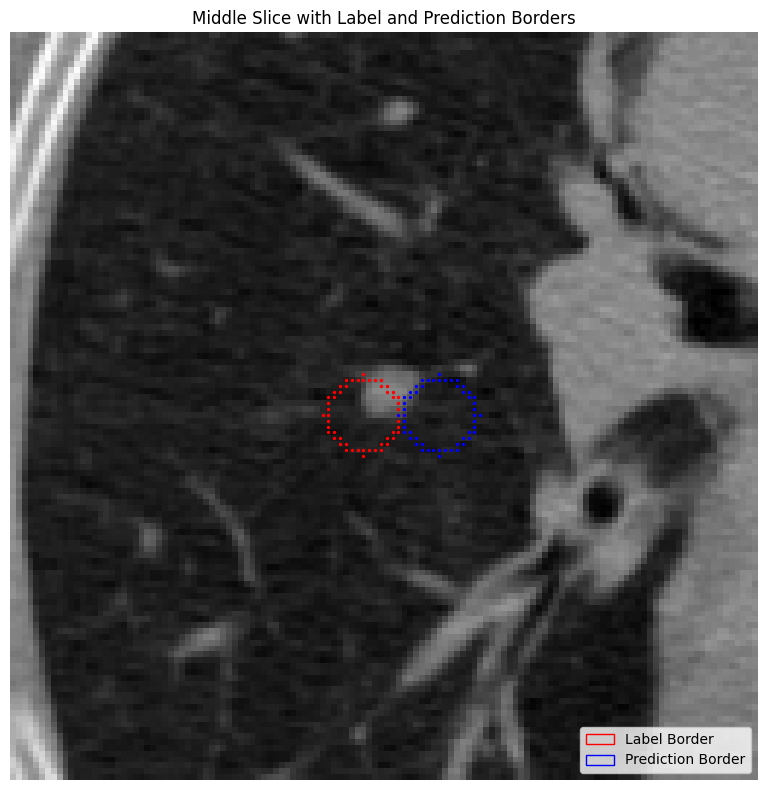

In [6]:
visualize_middle_slice_with_border(im, pred, label)